# 球员分析

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
play_data = pd.read_csv('inputData/player_data.csv')

In [141]:
play_data.head()

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
0,勒布朗-詹姆斯,03-04,负,国王106-92骑士,60.0%,6,9,4,0,25
1,勒布朗-詹姆斯,03-04,负,太阳95-86骑士,47.1%,12,8,1,0,21
2,勒布朗-詹姆斯,03-04,负,开拓者104-85骑士,25.0%,4,6,2,0,8
3,勒布朗-詹姆斯,03-04,负,掘金93-89骑士,27.3%,11,7,2,3,7
4,勒布朗-詹姆斯,03-04,负,步行者91-90骑士,44.4%,5,3,0,0,23


In [142]:
play_data.describe()

,rebounds,assists,steals,caps,scores
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,7.416107,7.214765,1.620805,0.770134,27.161913
std,3.012375,2.916846,1.303165,0.915863,7.889016
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,5.000000,1.000000,0.000000,22.000000
50%,7.000000,7.000000,1.000000,1.000000,27.000000
75%,9.000000,9.000000,2.000000,1.000000,32.000000
max,19.000000,19.000000,7.000000,5.000000,61.000000


In [143]:
play_data['rate_shot'] = play_data['rate_shot'].str.strip('%').astype(float) /100 #将百分号去掉转化为float类型

In [144]:
play_data.describe()

,rate_shot,rebounds,assists,steals,caps,scores
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,0.506038,7.416107,7.214765,1.620805,0.770134,27.161913
std,0.113290,3.012375,2.916846,1.303165,0.915863,7.889016
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.435000,5.000000,5.000000,1.000000,0.000000,22.000000
50%,0.500000,7.000000,7.000000,1.000000,1.000000,27.000000
75%,0.579000,9.000000,9.000000,2.000000,1.000000,32.000000
max,0.929000,19.000000,19.000000,7.000000,5.000000,61.000000


In [145]:
play_data['rival'] = play_data['rival'].str.extract('(\d{0,2}.*?)\d')#使用series对象的str对象正则提取rival列的对手

In [146]:
play_data.head()

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
0,勒布朗-詹姆斯,03-04,负,国王,0.600,6,9,4,0,25
1,勒布朗-詹姆斯,03-04,负,太阳,0.471,12,8,1,0,21
2,勒布朗-詹姆斯,03-04,负,开拓者,0.250,4,6,2,0,8
3,勒布朗-詹姆斯,03-04,负,掘金,0.273,11,7,2,3,7
4,勒布朗-詹姆斯,03-04,负,步行者,0.444,5,3,0,0,23


In [181]:
play_data['race_rst'] = play_data['race_rst'].replace(['负'],0)
play_data['race_rst'] = play_data['race_rst'].replace(['胜'],1)#胜为1，负为0

In [148]:
play_data.head()

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
0,勒布朗-詹姆斯,03-04,0,国王,0.600,6,9,4,0,25
1,勒布朗-詹姆斯,03-04,0,太阳,0.471,12,8,1,0,21
2,勒布朗-詹姆斯,03-04,0,开拓者,0.250,4,6,2,0,8
3,勒布朗-詹姆斯,03-04,0,掘金,0.273,11,7,2,3,7
4,勒布朗-詹姆斯,03-04,0,步行者,0.444,5,3,0,0,23


In [11]:
play_data.groupby('rival').sum().iloc[1:,2:].sort_values('scores',ascending=False).head()

,rebounds,assists,steals,caps,scores
rival,,,,,
雄鹿,413,391,83,39,1604
公牛,417,364,98,47,1603
步行者,428,369,97,52,1534
老鹰,444,395,99,38,1507
凯尔特,369,357,88,54,1493


In [189]:
play_data.sort_values('scores',ascending=False).head(10)#球员生涯最高得分排名

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
819,勒布朗-詹姆斯,13-14,1,山猫,66.7%,7,4,0,0,61
1069,勒布朗-詹姆斯,17-18,1,奇才,67.6%,11,7,3,2,57
140,勒布朗-詹姆斯,04-05,0,猛龙,50.0%,10,5,2,0,56
443,勒布朗-詹姆斯,08-09,1,雄鹿,55.2%,5,9,0,0,55
438,勒布朗-詹姆斯,08-09,1,尼克斯,51.5%,9,11,0,2,52
177,勒布朗-詹姆斯,05-06,0,雄鹿,65.5%,7,7,2,0,52
594,勒布朗-詹姆斯,10-11,1,魔术,68.0%,11,8,1,1,51
455,勒布朗-詹姆斯,08-09,1,国王,53.3%,4,9,2,3,51
1158,勒布朗-詹姆斯,18-19,1,热火,61.3%,8,3,2,1,51
348,勒布朗-詹姆斯,07-08,1,灰熊,64.3%,8,9,3,1,51


In [13]:
play_data.head()

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
0,勒布朗-詹姆斯,03-04,0,国王,0.600,6,9,4,0,25
1,勒布朗-詹姆斯,03-04,0,太阳,0.471,12,8,1,0,21
2,勒布朗-詹姆斯,03-04,0,开拓者,0.250,4,6,2,0,8
3,勒布朗-詹姆斯,03-04,0,掘金,0.273,11,7,2,3,7
4,勒布朗-詹姆斯,03-04,0,步行者,0.444,5,3,0,0,23


In [19]:
play_data.groupby('rival').mean().iloc[1:,0:1].sort_values('race_rst').head(10)#球员职业生涯对战球队最低胜率排名

,race_rst
rival,
火箭,0.433333
马刺,0.451613
掘金,0.451613
超音速,0.500000
公牛,0.535714
勇士,0.535714
鹈鹕,0.538462
小牛,0.576923
热火,0.578947


# 机器学习数据分析

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
team_data = pd.read_csv('inputData/team_data1.csv')
team_data.head()

,year,team_name,wins,loss,win_rates,coach_off_times,coach_wins_rate,coach_champions
0,1985,波士顿凯尔特人,67,15,81.7%,9,67.4,2
1,1985,密尔沃基雄鹿,57,25,69.5%,18,55.7,0
2,1985,费城76人,54,28,65.9%,2,43.0,0
3,1985,亚特兰大老鹰,50,32,61.0%,11,54.9,0
4,1985,底特律活塞,46,36,56.1%,12,59.3,2


In [3]:
team_data.rename(columns={'year':'season'},inplace=True)#将yaer列名字改成season列，方便后面的连接操作

In [4]:
teams = ['马刺', '小牛', '太阳', '勇士', '骑士', '爵士', '掘金', '开拓者', '快船', '篮网', '超音速',
       '公牛', '火箭', '活塞', '尼克斯', '雄鹿', '子弹', '国王', '步行者', '凯尔特', '76人',
       '老鹰', '热火', '黄蜂', '魔术', '森林狼', '灰熊', '猛龙', '奇才', '山猫', '雷霆', '鹈鹕',
       '独行侠','湖人']

In [5]:
#次函数得到team_data里队伍的对名，去掉前面的地名
def get_team(x):
    for i in teams:
        if(i in x):
            return i

In [6]:
team_data['rival'] = team_data['team_name'].apply(get_team)
team_data.drop('team_name',axis=1,inplace=True)

In [7]:
lakes_info = team_data.loc[team_data['rival']=="热火"]

In [8]:
team_data= team_data.loc[team_data['rival']!='热火']#去除湖人队，因为我们需要预测湖人的比赛结果，对手不可能是湖人队
team_data['wins-loss'] = team_data['wins'] - team_data['loss']
team_data['win_rates'] = team_data['win_rates'].str.strip('%').astype(float) /100 #将百分号去掉转化为float类型
team_data.head()

,season,wins,loss,win_rates,coach_off_times,coach_wins_rate,coach_champions,rival,wins-loss
0,1985,67,15,0.817,9,67.4,2,凯尔特,52
1,1985,57,25,0.695,18,55.7,0,雄鹿,32
2,1985,54,28,0.659,2,43.0,0,76人,26
3,1985,50,32,0.610,11,54.9,0,老鹰,18
4,1985,46,36,0.561,12,59.3,2,活塞,10


In [21]:
lake_data = pd.read_csv('inputData/.csv')
lake_data = lake_data.iloc[:,1:]
lake_data.head()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days
0,洛杉矶湖人,1985-10-26,胜,客,马刺116-121湖人,49.5%,53,30,121,1985,1985-10-25,1
1,洛杉矶湖人,1985-10-29,胜,客,小牛115-133湖人,57.4%,60,35,133,1985,1985-10-26,3
2,洛杉矶湖人,1985-10-31,胜,客,太阳107-144湖人,59.1%,50,42,144,1985,1985-10-29,2
3,洛杉矶湖人,1985-11-02,胜,客,勇士116-120湖人,58.3%,36,25,120,1985,1985-10-31,2
4,洛杉矶湖人,1985-11-05,负,主,骑士129-111湖人,42.2%,43,26,111,1985,1985-11-02,3


In [ ]:
# tmp_data = list([i for i in np.array(lake_data.game_time)[:-1]])
# tmp_data.insert(0,'1985-10-25')
# lake_data['game_time1'] = tmp_data
# lake_data['game_time'] = pd.to_datetime(lake_data['game_time'])
# lake_data['game_time1'] = pd.to_datetime(lake_data['game_time1'])
# lake_data['days'] = lake_data['game_time'] - lake_data['game_time1']
# lake_data.to_csv('inputData/days.csv')这段代码是为了求出比赛相隔的天数，生产一个新的文件，在去处理文件，重新读取即可

In [22]:
#此函数求出湖人队每场的比赛所在的赛季，也是用于连接
def get_season(game_time):
    ymd_lst = game_time.split('-')
    year = ymd_lst[0]
    month = int(ymd_lst[1])
    day = ymd_lst[2]
    if(month>9):
        return int(year)
    else:
        return int(year) -1

In [23]:
lake_data['season'] = lake_data['game_time'].apply(get_season)

In [24]:
lake_data.tail()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days
2721,洛杉矶湖人,2019-03-04,负,主,快船113-105湖人,41.8%,40,22,105,2018,2019-03-02,2
2722,洛杉矶湖人,2019-03-06,负,主,掘金115-99湖人,47.6%,41,26,99,2018,2019-03-04,2
2723,洛杉矶湖人,2019-03-09,负,主,凯尔特120-107湖人,48.4%,43,28,107,2018,2019-03-06,3
2724,洛杉矶湖人,2019-03-12,胜,客,公牛107-123湖人,54.7%,41,23,123,2018,2019-03-09,3
2725,洛杉矶湖人,2019-03-14,负,客,猛龙111-98湖人,44.7%,46,24,98,2018,2019-03-12,2


In [25]:
lake_data['rival'] = lake_data['rival'].str.extract('(\d{0,2}.*?)\d')#正则提取湖人的对手

In [26]:
lake_data.head()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days
0,洛杉矶湖人,1985-10-26,胜,客,马刺,49.5%,53,30,121,1985,1985-10-25,1
1,洛杉矶湖人,1985-10-29,胜,客,小牛,57.4%,60,35,133,1985,1985-10-26,3
2,洛杉矶湖人,1985-10-31,胜,客,太阳,59.1%,50,42,144,1985,1985-10-29,2
3,洛杉矶湖人,1985-11-02,胜,客,勇士,58.3%,36,25,120,1985,1985-10-31,2
4,洛杉矶湖人,1985-11-05,负,主,骑士,42.2%,43,26,111,1985,1985-11-02,3


In [27]:
lake_data['game_month'] = lake_data['game_time'].str.extract('-(.*?)-')

In [28]:
lake_data.head()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days,game_month
0,洛杉矶湖人,1985-10-26,胜,客,马刺,49.5%,53,30,121,1985,1985-10-25,1,10
1,洛杉矶湖人,1985-10-29,胜,客,小牛,57.4%,60,35,133,1985,1985-10-26,3,10
2,洛杉矶湖人,1985-10-31,胜,客,太阳,59.1%,50,42,144,1985,1985-10-29,2,10
3,洛杉矶湖人,1985-11-02,胜,客,勇士,58.3%,36,25,120,1985,1985-10-31,2,11
4,洛杉矶湖人,1985-11-05,负,主,骑士,42.2%,43,26,111,1985,1985-11-02,3,11


In [29]:
lake_data = lake_data.loc[lake_data['rival']!=' ']
lake_data.head()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days,game_month
0,洛杉矶湖人,1985-10-26,胜,客,马刺,49.5%,53,30,121,1985,1985-10-25,1,10
1,洛杉矶湖人,1985-10-29,胜,客,小牛,57.4%,60,35,133,1985,1985-10-26,3,10
2,洛杉矶湖人,1985-10-31,胜,客,太阳,59.1%,50,42,144,1985,1985-10-29,2,10
3,洛杉矶湖人,1985-11-02,胜,客,勇士,58.3%,36,25,120,1985,1985-10-31,2,11
4,洛杉矶湖人,1985-11-05,负,主,骑士,42.2%,43,26,111,1985,1985-11-02,3,11


In [31]:
lake_data = lake_data.loc[lake_data['season']!=2018]
lake_data.tail()

,team_name,game_time,game_rst,host_guest,rival,shot_rate,rebounds,assists,scores,season,game_time1,days,game_month
2653,洛杉矶湖人,2018-04-04,胜,主,马刺,54.7%,44,32,122,2017,2018-04-03,1,04
2654,洛杉矶湖人,2018-04-06,负,主,森林狼,39.2%,53,16,96,2017,2018-04-04,2,04
2655,洛杉矶湖人,2018-04-08,负,主,爵士,39.8%,44,20,97,2017,2018-04-06,2,04
2656,洛杉矶湖人,2018-04-10,负,主,火箭,42.2%,47,22,99,2017,2018-04-08,2,04
2657,洛杉矶湖人,2018-04-11,胜,客,快船,47.7%,49,25,115,2017,2018-04-10,1,04


In [86]:
detail_info = pd.merge(team_data,lake_data,on=['rival','season'])

In [87]:
detail_info.to_csv('inputData/details.csv',index=False)

# 可视化数据

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
play_data = pd.read_csv('inputData/player_data.csv')
play_data['rival'] = play_data['rival'].str.extract('(\d{0,2}.*?)\d')

In [29]:
play_data.head()

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores
0,勒布朗-詹姆斯,03-04,负,国王,60.0%,6,9,4,0,25
1,勒布朗-詹姆斯,03-04,负,太阳,47.1%,12,8,1,0,21
2,勒布朗-詹姆斯,03-04,负,开拓者,25.0%,4,6,2,0,8
3,勒布朗-詹姆斯,03-04,负,掘金,27.3%,11,7,2,3,7
4,勒布朗-詹姆斯,03-04,负,步行者,44.4%,5,3,0,0,23


In [8]:
total_score = play_data.groupby('rival').sum().iloc[1:,2:].sort_values('scores',ascending=False)

In [9]:
play_data['race_rst'] = play_data['race_rst'].replace(['负'],0)
play_data['race_rst'] = play_data['race_rst'].replace(['胜'],1)#胜为1，负为0

In [10]:
low_rate_team = play_data.groupby('rival').mean().iloc[1:,0:1].sort_values('race_rst').reset_index().head(5)
high_rate_team =  play_data.groupby('rival').mean().iloc[1:,0:1].sort_values('race_rst',ascending=False).reset_index().head(5)

In [11]:
high_rate_team

,rival,race_rst
0,独行侠,1.000000
1,骑士,0.928571
2,山猫,0.857143
3,黄蜂,0.800000
4,76人,0.795455


In [23]:
scores_rank = play_data.sort_values('scores',ascending=False).head(10)

In [24]:
scores_rank['info'] = scores_rank['season'] + scores_rank['rival']
scores_rank

,player_name,season,race_rst,rival,rate_shot,rebounds,assists,steals,caps,scores,info
819,勒布朗-詹姆斯,13-14,1,山猫,66.7%,7,4,0,0,61,13-14山猫
1069,勒布朗-詹姆斯,17-18,1,奇才,67.6%,11,7,3,2,57,17-18奇才
140,勒布朗-詹姆斯,04-05,0,猛龙,50.0%,10,5,2,0,56,04-05猛龙
443,勒布朗-詹姆斯,08-09,1,雄鹿,55.2%,5,9,0,0,55,08-09雄鹿
438,勒布朗-詹姆斯,08-09,1,尼克斯,51.5%,9,11,0,2,52,08-09尼克斯
177,勒布朗-詹姆斯,05-06,0,雄鹿,65.5%,7,7,2,0,52,05-06雄鹿
594,勒布朗-詹姆斯,10-11,1,魔术,68.0%,11,8,1,1,51,10-11魔术
455,勒布朗-詹姆斯,08-09,1,国王,53.3%,4,9,2,3,51,08-09国王
1158,勒布朗-詹姆斯,18-19,1,热火,61.3%,8,3,2,1,51,18-19热火
348,勒布朗-詹姆斯,07-08,1,灰熊,64.3%,8,9,3,1,51,07-08灰熊


In [25]:
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']

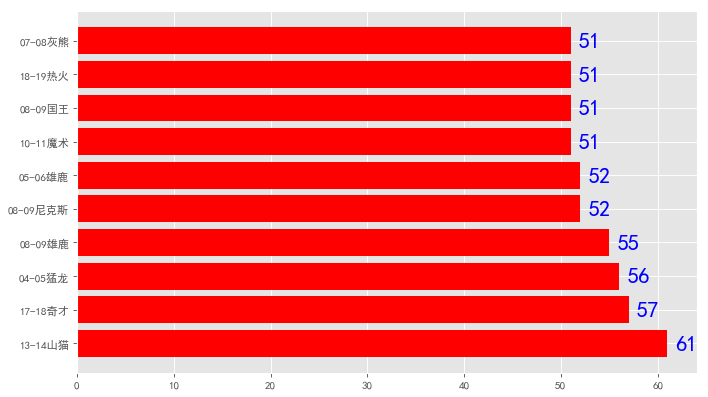

In [27]:
x = scores_rank['info']
y = scores_rank['scores']
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(np.arange(len(x)),y,color=['r'],tick_label=x)
for a,b in zip(np.arange(len(x)),y):
    ax.text(b+2,a-0.2,b,ha="center",fontsize=20,color='b')

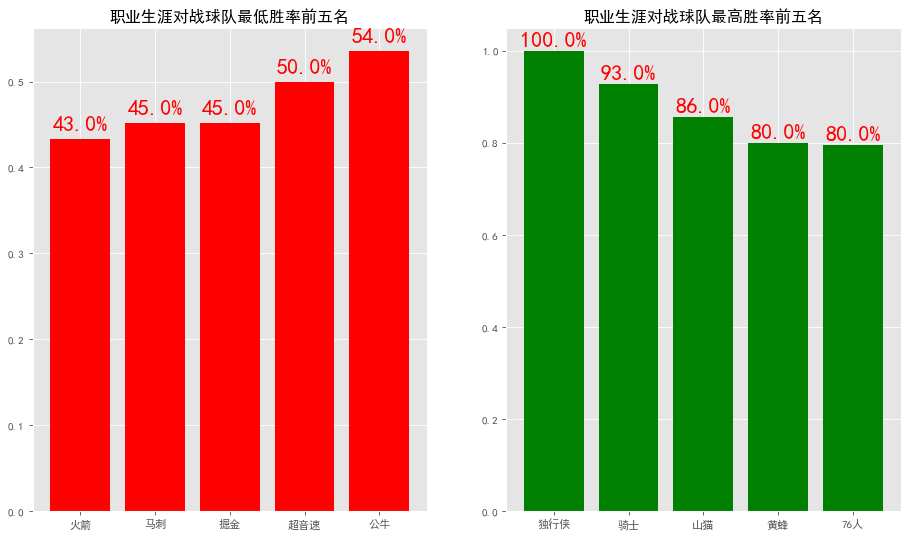

In [38]:
x1 = low_rate_team['rival']
y1 = low_rate_team['race_rst']
plt.style.use("ggplot")
fig= plt.figure(figsize=(14,8),dpi=80)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(np.arange(len(x)),y1,tick_label=x1,color=['r'])
ax1.set_title('职业生涯对战球队最低胜率前五名')
for a,b in zip(np.arange(len(x)),y):
    ax1.text(a,b+0.01,str(round(b,2)*100)+'%',ha="center",fontsize=20,color='red')
    
x2 = high_rate_team['rival']
y2= high_rate_team['race_rst']
ax2.bar(np.arange(len(x)),y2,tick_label=x2,color=['g'])
ax2.set_title('职业生涯对战球队最高胜率前五名')
for a,b in zip(np.arange(len(x)),y2):
    ax2.text(a,b+0.01,str(round(b,2)*100)+'%',ha="center",fontsize=20,color='red')

In [45]:
play_data.groupby('rival').sum().iloc[1:,2:].sort_values('scores',ascending=False).to_csv('rst.csv')

In [46]:
team_loc = pd.read_csv('team1.csv')

In [57]:
team_loc.iloc[:,4:6].groupby('state').sum().sort_values('scores',ascending=False).to_csv('team2.csv')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
players_career_data = pd.read_csv('inputData/players_career_data.csv')

In [5]:
players_career_data.head(5)

,chinese_name,english_name,points,assists,rebounds,steals,shot_rate,block
0,勒布朗-詹姆斯,LeBron James,27.2,7.2,7.4,1.6,50.4,0.8
1,斯蒂芬-库里,Stephen Curry,23.5,6.6,4.5,1.7,47.7,0.2
2,詹姆斯-哈登,James Harden,24.2,6.2,5.2,1.6,44.2,0.5
3,科比-布莱恩特,Kobe Bryant,25.0,4.7,5.2,1.4,44.7,0.5
4,凯文-杜兰特,Kevin Durant,27.1,4.1,7.1,1.1,49.2,1.1


In [6]:
max_lst = list(np.array(players_career_data.describe().iloc[7:8,:])[0])

In [7]:
data = np.array(players_career_data.iloc[0:1,2:])[0]
data =np.array([data[i]/max_lst[i] for i in range(6)])
data

array([0.90365449, 0.64285714, 0.54411765, 0.69565217, 0.75223881,
       0.25806452])

No handles with labels found to put in legend.


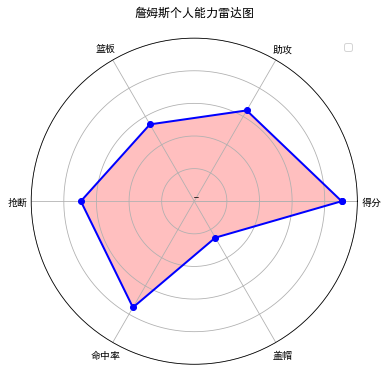

In [8]:
plt.rcParams['font.sans-serif']=['SimHei']
#=======自己设置开始============
#标签
labels = ['得分','助攻','篮板','抢断','命中率','盖帽']
#数据个数
dataLenth = 6
#数据



data1 = np.concatenate((data, [data[0]]))
#data2 = np.concatenate((data2, [data2[0]]))
#========自己设置结束============

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data1, 'bo-', linewidth=2)# 画线
ax.fill(angles, data1, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("詹姆斯个人能力雷达图")
ax.set_rgrids(np.arange(0,1.2,0.2),'-')
plt.legend(loc="upper right")
ax.grid(True)
plt.show()

In [92]:
import pandas as pd

In [99]:
details = pd.read_csv('inputData/details.csv')

In [100]:
details = details.iloc[:,:]
details.head()

,season,wins,loss,win_rates,coach_off_times,coach_wins_rate,coach_champions,rival,wins-loss,team_name,game_time,game_rst,host_guest,shot_rate,rebounds,assists,scores,game_time1,days,game_month
0,1985,67,15,0.817,9,67.4,2,凯尔特,52,洛杉矶湖人,1986-01-22,负,客,38.6%,50,17,95,1986-01-20,2,1
1,1985,67,15,0.817,9,67.4,2,凯尔特,52,洛杉矶湖人,1986-02-16,负,主,43.6%,40,27,99,1986-02-14,2,2
2,1985,57,25,0.695,18,55.7,0,雄鹿,32,洛杉矶湖人,1985-12-18,胜,客,53.8%,48,25,107,1985-12-17,1,12
3,1985,57,25,0.695,18,55.7,0,雄鹿,32,洛杉矶湖人,1986-01-28,胜,主,63.7%,32,33,125,1986-01-25,3,1
4,1985,54,28,0.659,2,43.0,0,76人,26,洛杉矶湖人,1986-01-31,胜,主,62.9%,31,33,134,1986-01-30,1,1


In [103]:
details.drop(['wins','loss','coach_champions','rival','team_name','game_time','shot_rate','rebounds','assists','scores','game_time1',],axis=1,inplace=True).head()

AttributeError: 'NoneType' object has no attribute 'head'

In [104]:
details.head()

,season,win_rates,coach_off_times,coach_wins_rate,wins-loss,game_rst,host_guest,days,game_month
0,1985,0.817,9,67.4,52,负,客,2,1
1,1985,0.817,9,67.4,52,负,主,2,2
2,1985,0.695,18,55.7,32,胜,客,1,12
3,1985,0.695,18,55.7,32,胜,主,3,1
4,1985,0.659,2,43.0,26,胜,主,1,1


In [105]:
details.columns = ['season','rival_rates','rival_coach_times','rival_coach_rates','rival_wl','rst','host_guest','days','game_month']

In [108]:
end_info = pd.merge(details,lakes_info,on=['season'])

In [112]:

end_info.head()

,season,rival_rates,rival_coach_times,rival_coach_rates,rival_wl,rst,host_guest,days,game_month,wins,loss,win_rates,coach_off_times,coach_wins_rate,coach_champions,rival
0,1985,0.817,9,67.4,52,负,客,2,1,62,20,75.6%,21,63.6,5,湖人
1,1985,0.817,9,67.4,52,负,主,2,2,62,20,75.6%,21,63.6,5,湖人
2,1985,0.695,18,55.7,32,胜,客,1,12,62,20,75.6%,21,63.6,5,湖人
3,1985,0.695,18,55.7,32,胜,主,3,1,62,20,75.6%,21,63.6,5,湖人
4,1985,0.659,2,43.0,26,胜,主,1,1,62,20,75.6%,21,63.6,5,湖人


In [113]:
end_info['win_rates'] = end_info['win_rates'].map(lambda x:x[:-1]).astype(float) / 100

In [115]:
end_info.drop(['season','rival'],axis=1,inplace=True)

In [124]:
end_info = pd.read_csv('inputData/end_info.csv')
end_info.head()

,rival_rates,rival_coach_times,rival_coach_rates,rival_wl,rst,host_guest,days,game_month,wins,loss,win_rates,coach_off_times,coach_wins_rate,coach_champions
0,0.817,9,67.4,52,负,客,2,1,62,20,0.756,21,63.6,5
1,0.817,9,67.4,52,负,主,2,2,62,20,0.756,21,63.6,5
2,0.695,18,55.7,32,胜,客,1,12,62,20,0.756,21,63.6,5
3,0.695,18,55.7,32,胜,主,3,1,62,20,0.756,21,63.6,5
4,0.659,2,43.0,26,胜,主,1,1,62,20,0.756,21,63.6,5


In [127]:
end_info['rst'] = end_info['rst'].replace({'负':0,'胜':1})

In [129]:
end_info['host_guest'] = end_info['host_guest'].replace({'客':0,'主':1})

In [134]:
end_info['label'] = end_info['rst']

In [139]:
end_info.to_csv('inputData/machine_data.csv')